## 4-2. 스크래핑 결과 시각화하기 I - 기상청 날씨 정보 조회

- Selenium과 Seaborn을 이용해서 날씨 정보를 가져온 후 Lineplot을 그려봅시다.

### Target: 기상청 날씨 스크래핑하기

다음 사이트에 Selenium을 이용해서 날씨 정보를 가져와봅시다. : https://www.weather.go.kr/w/weather/forecast/short-term.do

In [5]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import ActionChains
# from selenium.webdriver import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

지난 실습에서 다룬 마우스 실습을 통해 로그인 창에 접속하는 것에 성공했는데요,  
여기에 이제 키보드 입력을 넣어서 로그인을 완료해봅시다.

In [30]:
# driver를 이용해 기상청 날씨 데이터를 가져와봅시다.

driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))
driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")
driver.implicitly_wait(10)
temps = driver.find_element(By.ID, "my-tchart").text

temps = [int(t) for t in temps.replace("℃", "").split("\n")]
print(temps)

//*[@id="digital-forecast"]/div[1]/div[3]/div[2]/div[1]/div[1]/div/div[2]/ul[1]/li[1]/span[2]
//*[@id="digital-forecast"]/div[1]/div[3]/div[2]/div[1]/div[1]/div/div[2]/ul[2]/li[1]/span[2]
//*[@id="digital-forecast"]/div[1]/div[3]/div[2]/div[1]/div[1]/div/div[2]/ul[12]/li[1]/span[2]

[19, 20, 20, 18, 18, 16, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 10, 9]



In [48]:
hours = []
for i in range(1, 13):
    hour = driver.find_element(By.XPATH, f'//*[@id="digital-forecast"]/div[1]/div[3]/div[2]/div[1]/div[1]/div/div[2]/ul[{i}]/li[1]/span[2]')
    hours.append(hour.text)

for _ in range(len(temps) - len(hours)):
    hour = str(int(hours[-1].replace("시", "")) + 1) + '시'
    hours.append(hour)

hours = [h.replace("시", "") for h in hours]
print(hours)

['13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6', '7']


**꺾은선 그래프(Line Plot)** 을 이용해 앞으로의 기온의 추이를 나타내봅시다.


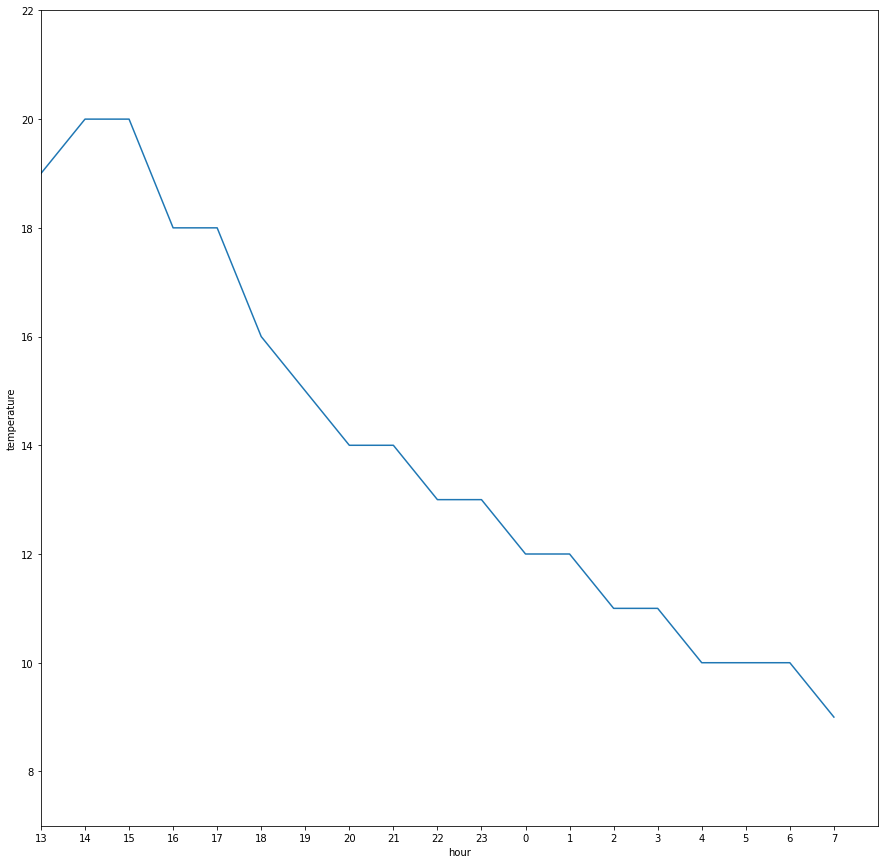

In [51]:
# 받아온 데이터를 통해 꺾은선 그래프를 그려봅시다.
# x = Elapsed Time(0~len(temperatures)
# y = temperatures

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.ylim(min(temps) - 2, max(temps) + 2)
plt.xlim(0, len(hours))

plt.xlabel("hour")
plt.ylabel("temperature")
sns.lineplot(
    x = hours,
    y = temps
)

plt.show()

In [ ]:
# 받아온 데이터를 통해 꺾은선 그래프를 그려봅시다.

